In [1]:
did = False
if not did:
    %cd ..
    did = True

/Users/adsurbum/projects/univer/EffectiveNPI/src


In [2]:
%load_ext autoreload
%autoreload
exec(open("plot_utils.py").read())

/Users/adsurbum/anaconda2/envs/py371/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
import os,fnmatch

def calc_stats(countries,dir_name,zeros):
    dic_arr = []
    loglik_arr = []
    lnprobs = []
    for country_name in countries:
        load_data(dir_name+country_name+'.npz',country_name)
        dic_arr.append(calc_DIC())
        loglik_arr.append(calc_LoglikMAP(zeros))
        lnprobs.append(logliks.mean())
    return dic_arr,loglik_arr,lnprobs

def plot_diff(countries,arr1,arr2,label, model_r, model_l):
    dic_diff = np.array(round_list(np.array(arr1)-np.array(arr2)))
    countries = np.array(countries)
    s = dic_diff.argsort()
    dic_diff = dic_diff[s]
    countries = countries[s]

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(dic_diff,countries,'ok');
    ax.plot(dic_diff[dic_diff>=6],countries[dic_diff>=6],'ok',color='red');
    ax.plot(dic_diff[dic_diff<=-6],countries[dic_diff<=-6],'ok',color='blue');
    ax.hlines(countries[dic_diff<0],dic_diff[dic_diff<0],0,color='blue')
    ax.hlines(countries[dic_diff>=0],dic_diff[dic_diff>=0],0,color='red')
    ax.set(
        xlabel=label+'\n\n'+'{} --> \n\n <-- {}'.format(model_r,model_l),
    )
    plt.axvline(0, ls='--', color='k')
    sns.despine()
    plt.tight_layout()
    return list(zip(countries,dic_diff))

def arrow_up():
    ax = plt.gca()
    ax.annotate('', xy=(-0.5, ax.get_ylim()[0]*0.4),xytext=(-0.5,ax.get_ylim()[0]*0.5),     
            arrowprops=dict(color='purple', width=0.5,headlength=10,headwidth=10),
            annotation_clip=False) 
def arrow_down():
    ax = plt.gca()
    ax.annotate('', xy=(-0.5, ax.get_ylim()[0]*0.5),xytext=(-0.5,ax.get_ylim()[0]*0.4),     
            arrowprops=dict(color='purple', width=0.5,headlength=10,headwidth=10),
            annotation_clip=False) 
def round_list(lst):
    return [round(v,1) for v in lst]
def print_stats(countries, lst, idx):
    return list(zip(countries, *[round_list(v[idx]) for v in lst]))

In [5]:
dir_name = '../{}/{}/inference/'.format('output','2020-05-09-zero-15-normal')
countries = [a[:-4] for a in fnmatch.filter(os.listdir(dir_name), '*.npz')]

In [6]:
%%time
dir_name = '../{}/{}/inference/'.format('output','2020-05-09-zero-5-normal')
zero5 = calc_stats(countries,dir_name,5)

CPU times: user 9.42 s, sys: 2.5 s, total: 11.9 s
Wall time: 12.4 s


In [9]:
%%time
dir_name = '../{}/{}/inference/'.format('output','2020-05-09-zero-10-normal')
zero10 = calc_stats(countries,dir_name,10)
dir_name = '../{}/{}/inference/'.format('output','2020-05-09-zero-15-normal')
zero15 = calc_stats(countries,dir_name,15)
dir_name = '../{}/{}/inference/'.format('output','2020-04-30-prior-walkers-model2-normal')
zero1 = calc_stats(countries,dir_name,1)

CPU times: user 30.6 s, sys: 7.52 s, total: 38.2 s
Wall time: 41.8 s


In [32]:
dir_name = '../{}/{}/inference/'.format('output','2020-05-09-zero-2-normal')
zero2 = calc_stats(countries,dir_name,2)

DIC from zero1 to zero15 (lower is better) zero 1 is the best


[('Sweden', 31.6, 32.7, 35.9, 32.2, 37.7),
 ('Belgium', 31.6, 32.7, 35.7, 39.8, 66.6),
 ('United_Kingdom', 72.3, 73.5, 46.7, 54.4, 52.7),
 ('Switzerland', 88.3, 79.6, 146.4, 99.3, 105.6),
 ('Germany', 208.1, 231.9, 230.4, 253.6, 271.6),
 ('Austria', 33.3, 32.1, 39.8, 65.6, 133.7),
 ('Spain', 109.7, 77.7, 78.1, 193.1, 109.9),
 ('France', 51.0, 56.6, 75.2, 72.6, 72.2),
 ('Italy', 270.5, 270.2, 299.8, 317.5, 307.9),
 ('Denmark', 40.9, 46.2, 48.4, 53.8, 64.8),
 ('Norway', 46.5, 47.4, 51.7, 53.4, 48.1)]

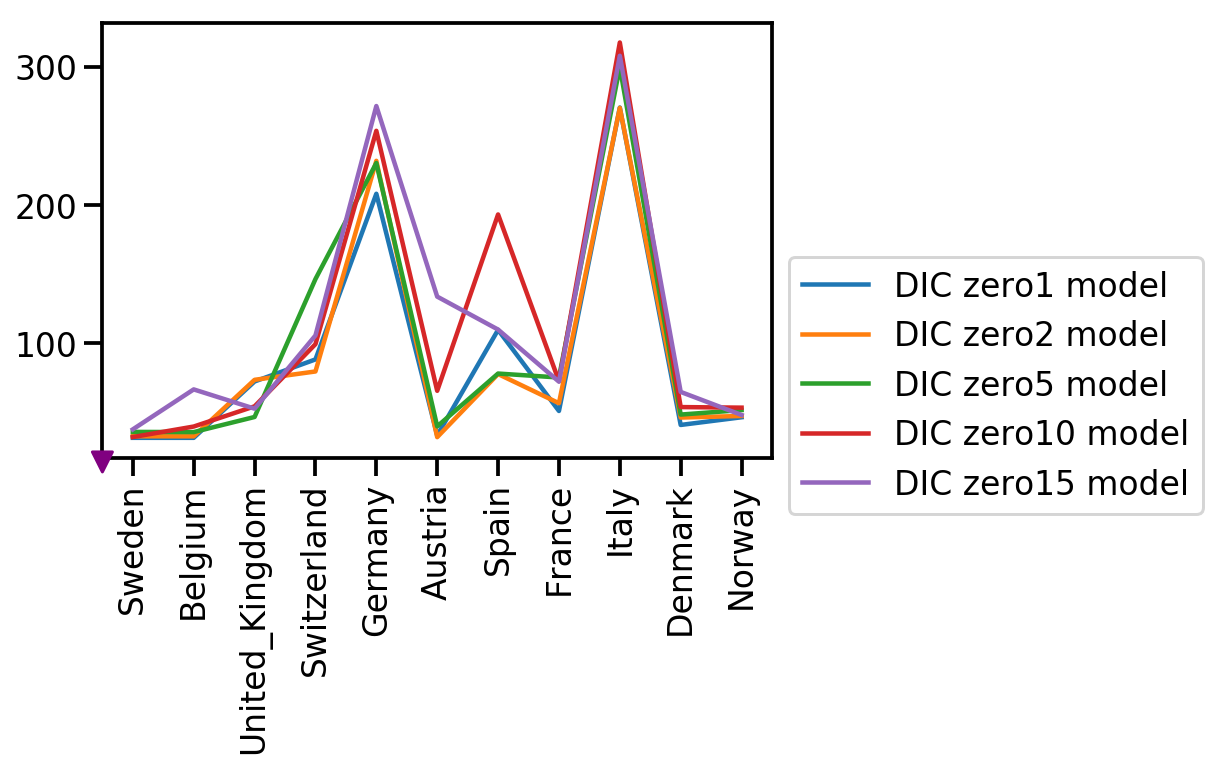

In [33]:
import matplotlib.pyplot as plt
plt.plot(zero1[0],label='DIC zero1 model')
plt.plot(zero2[0],label='DIC zero2 model')
plt.plot(zero5[0],label='DIC zero5 model')
plt.plot(zero10[0],label='DIC zero10 model')
plt.plot(zero15[0],label='DIC zero15 model')
plt.legend(bbox_to_anchor=(1, 0.5));
plt.xticks(np.arange(11),countries,rotation=90);
arrow_up()
print('DIC from zero1 to zero15 (lower is better) zero 1 is the best')
print_stats(countries, [zero1,zero2,zero5, zero10, zero15], 0)

loglik_E from zero1 to zero15 (higher is better) zero1 is the best


[('Sweden', -7.2, -6.8, -7.6, -9.7, -8.5),
 ('Belgium', -11.6, -11.6, -12.1, -12.0, -12.4),
 ('United_Kingdom', -13.1, -13.7, -13.6, -13.5, -16.0),
 ('Switzerland', -29.9, -30.0, -30.4, -31.7, -35.2),
 ('Germany', -75.3, -75.3, -75.2, -75.4, -76.8),
 ('Austria', -9.8, -10.1, -10.8, -11.0, -11.3),
 ('Spain', -26.2, -26.2, -26.8, -27.7, -27.7),
 ('France', -20.8, -20.9, -21.3, -20.9, -22.0),
 ('Italy', -111.6, -112.4, -116.0, -119.3, -120.2),
 ('Denmark', -13.4, -13.0, -13.5, -13.8, -13.3),
 ('Norway', -11.9, -12.2, -13.4, -13.7, -15.4)]

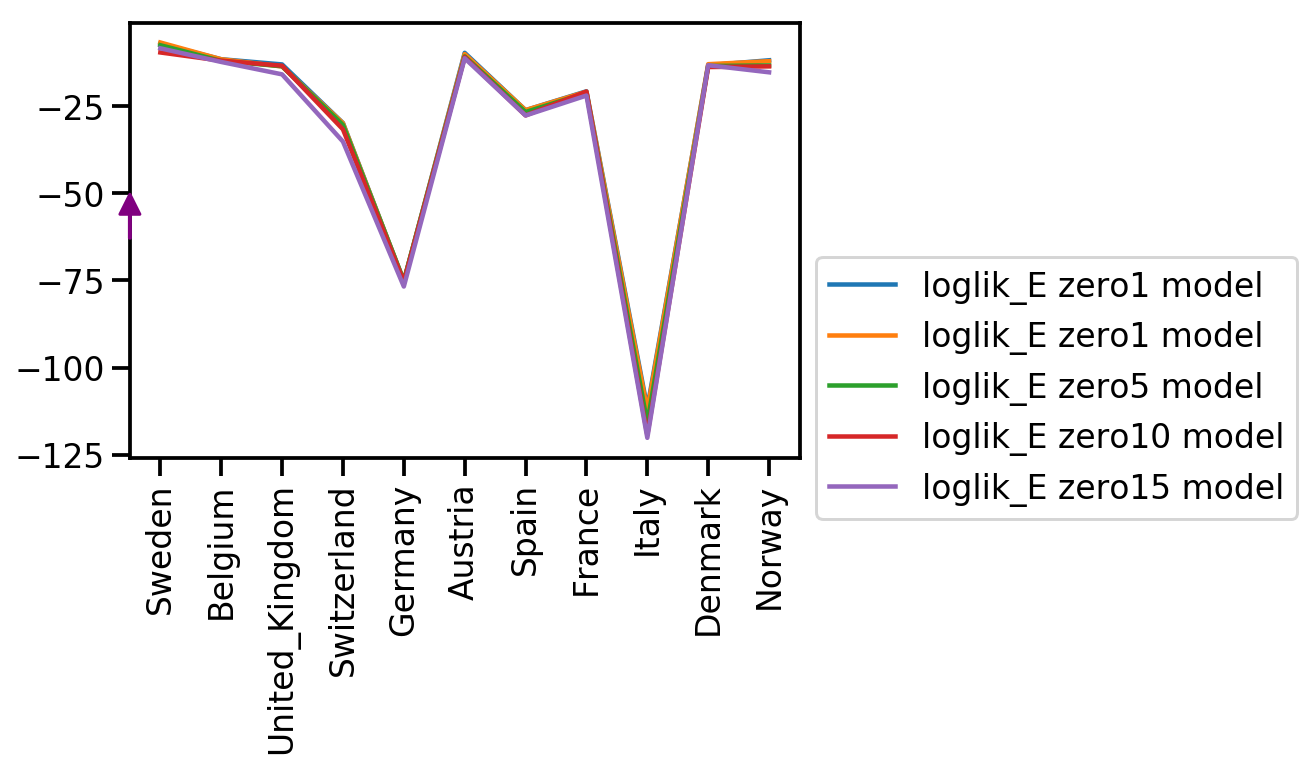

In [34]:
import matplotlib.pyplot as plt
plt.plot(zero1[1],label='loglik_E zero1 model')
plt.plot(zero2[1],label='loglik_E zero1 model')
plt.plot(zero5[1],label='loglik_E zero5 model')
plt.plot(zero10[1],label='loglik_E zero10 model')
plt.plot(zero15[1],label='loglik_E zero15 model')
plt.legend(bbox_to_anchor=(1, 0.5));
plt.xticks(np.arange(11),countries,rotation=90);
arrow_up()
print('loglik_E from zero1 to zero15 (higher is better) zero1 is the best')
print_stats(countries, [zero1, zero2, zero5, zero10, zero15], 1)

loglik_E from zero1 to zero15 (higher is better) zero1 is the best


[('Sweden', -11.5, -11.5, -12.4, -12.1, -12.7),
 ('Belgium', -13.7, -13.8, -14.5, -15.0, -21.4),
 ('United_Kingdom', -24.6, -25.0, -17.9, -19.0, -19.0),
 ('Switzerland', -37.0, -34.4, -50.2, -37.5, -39.3),
 ('Germany', -89.7, -94.5, -91.2, -93.2, -95.1),
 ('Austria', -13.2, -12.9, -14.8, -20.9, -37.6),
 ('Spain', -40.5, -32.2, -31.6, -59.6, -38.1),
 ('France', -23.2, -24.3, -28.5, -26.7, -26.8),
 ('Italy', -123.4, -122.3, -128.3, -130.1, -124.2),
 ('Denmark', -16.9, -17.9, -18.2, -18.9, -20.9),
 ('Norway', -17.6, -17.8, -19.0, -18.9, -17.9)]

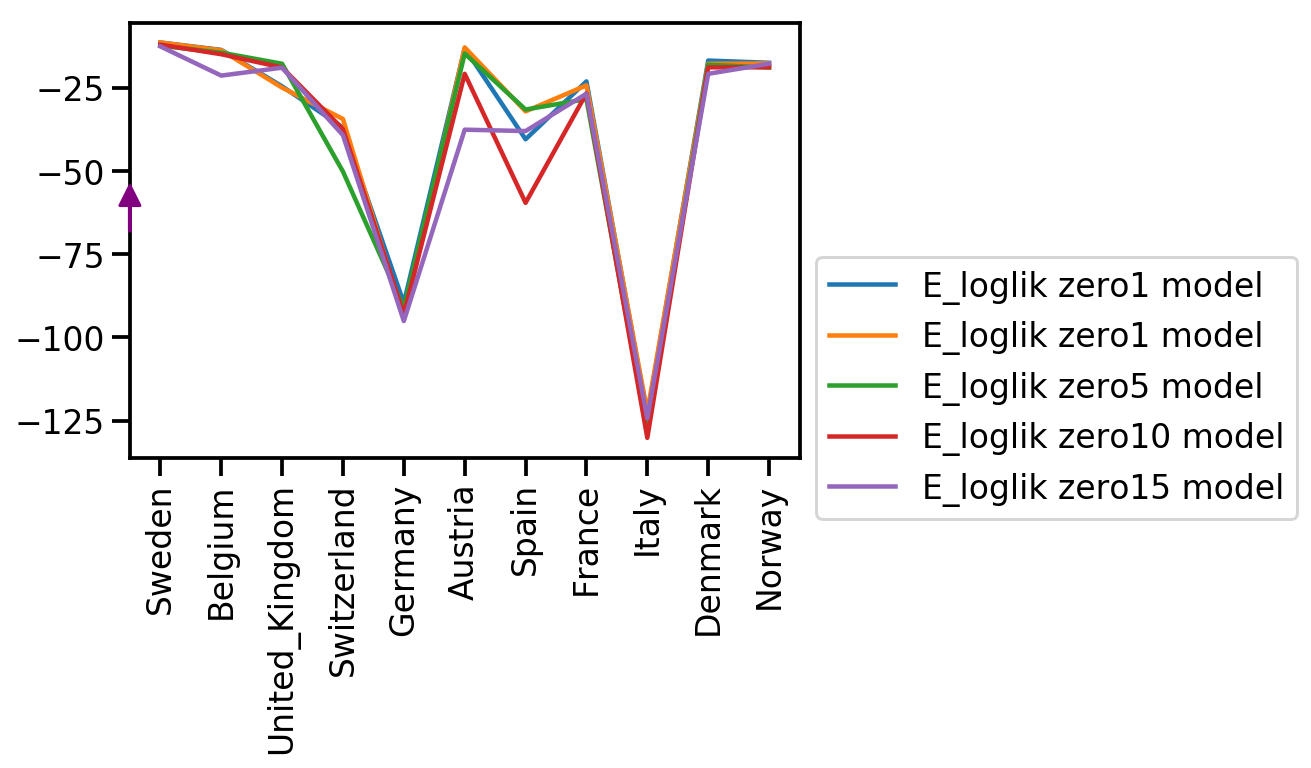

In [35]:
import matplotlib.pyplot as plt
plt.plot(zero1[2],label='E_loglik zero1 model')
plt.plot(zero2[2],label='E_loglik zero1 model')
plt.plot(zero5[2],label='E_loglik zero5 model')
plt.plot(zero10[2],label='E_loglik zero10 model')
plt.plot(zero15[2],label='E_loglik zero15 model')
plt.legend(bbox_to_anchor=(1, 0.5));
plt.xticks(np.arange(11),countries,rotation=90);
arrow_up()
print('loglik_E from zero1 to zero15 (higher is better) zero1 is the best')
print_stats(countries, [zero1, zero2, zero5, zero10, zero15], 2)

[('Germany', -23.8),
 ('France', -5.6),
 ('Denmark', -5.3),
 ('United_Kingdom', -1.2),
 ('Sweden', -1.1),
 ('Belgium', -1.1),
 ('Norway', -0.9),
 ('Italy', 0.2),
 ('Austria', 1.2),
 ('Switzerland', 8.7),
 ('Spain', 32.0)]

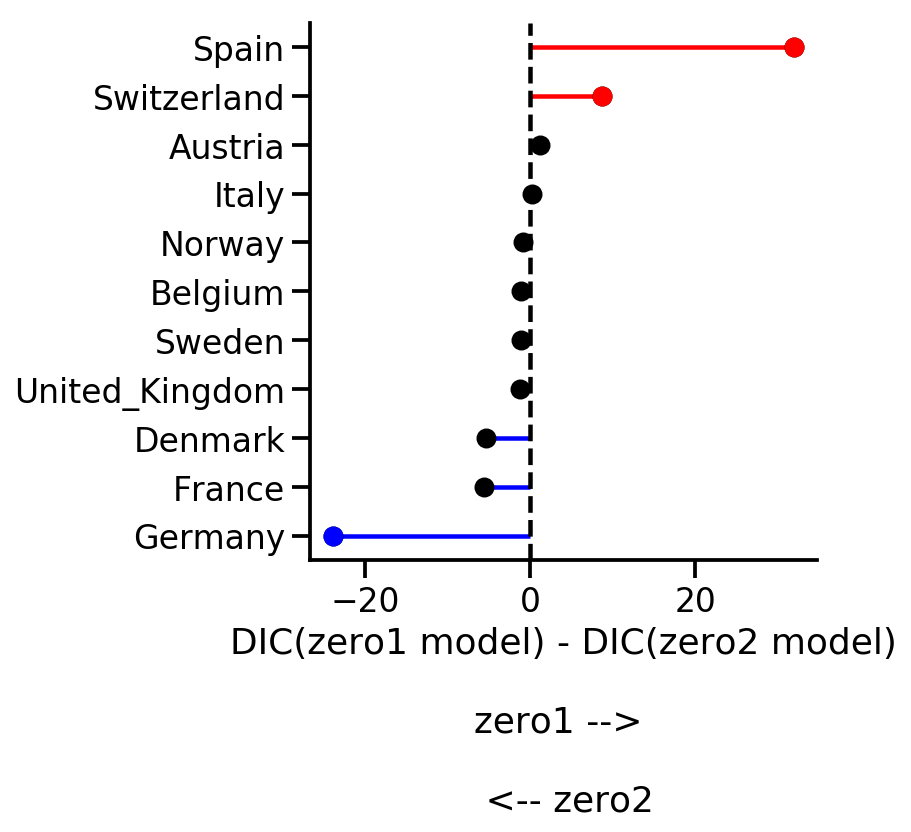

In [36]:
plot_diff(countries, zero1[0], zero2[0], 'DIC(zero1 model) - DIC(zero2 model)', 'zero1', 'zero2')

[('Italy', -0.8),
 ('United_Kingdom', -0.6),
 ('Austria', -0.4),
 ('Norway', -0.3),
 ('Switzerland', -0.1),
 ('France', -0.1),
 ('Belgium', -0.0),
 ('Germany', 0.0),
 ('Spain', 0.0),
 ('Denmark', 0.3),
 ('Sweden', 0.4)]

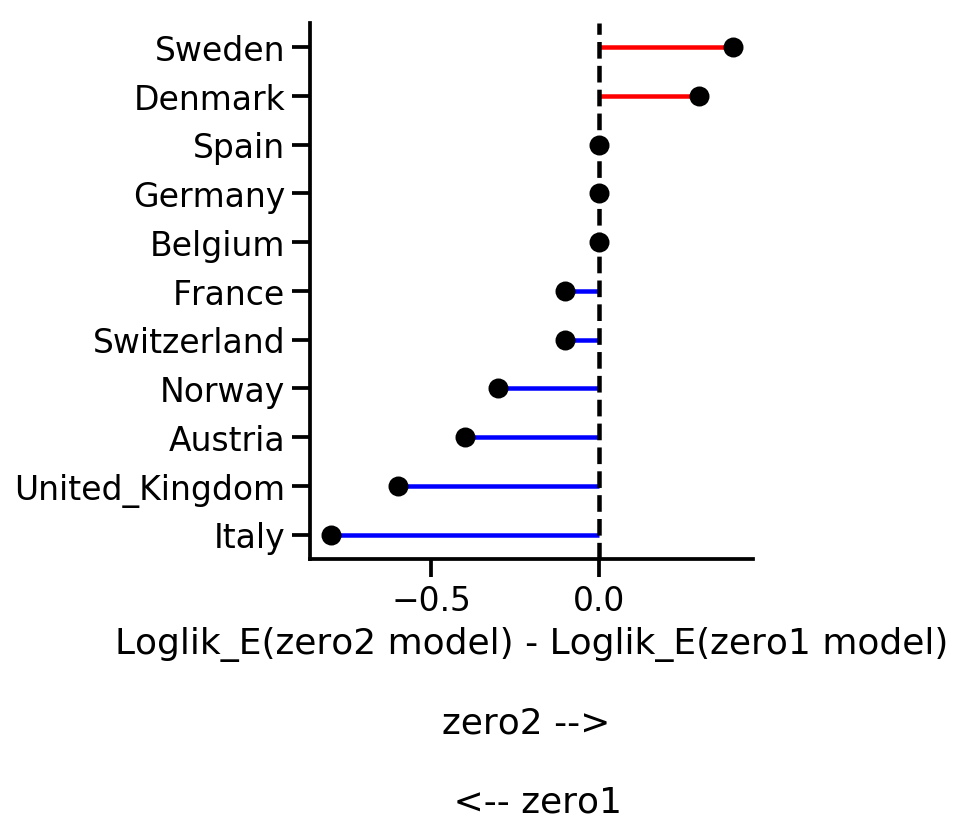

In [37]:
plot_diff(countries, zero2[1], zero1[1], 'Loglik_E(zero2 model) - Loglik_E(zero1 model)','zero2', 'zero1')

[('Spain', -115.1),
 ('Austria', -25.7),
 ('Germany', -23.3),
 ('Italy', -17.7),
 ('United_Kingdom', -7.7),
 ('Denmark', -5.4),
 ('Belgium', -4.0),
 ('Norway', -1.8),
 ('France', 2.6),
 ('Sweden', 3.7),
 ('Switzerland', 47.1)]

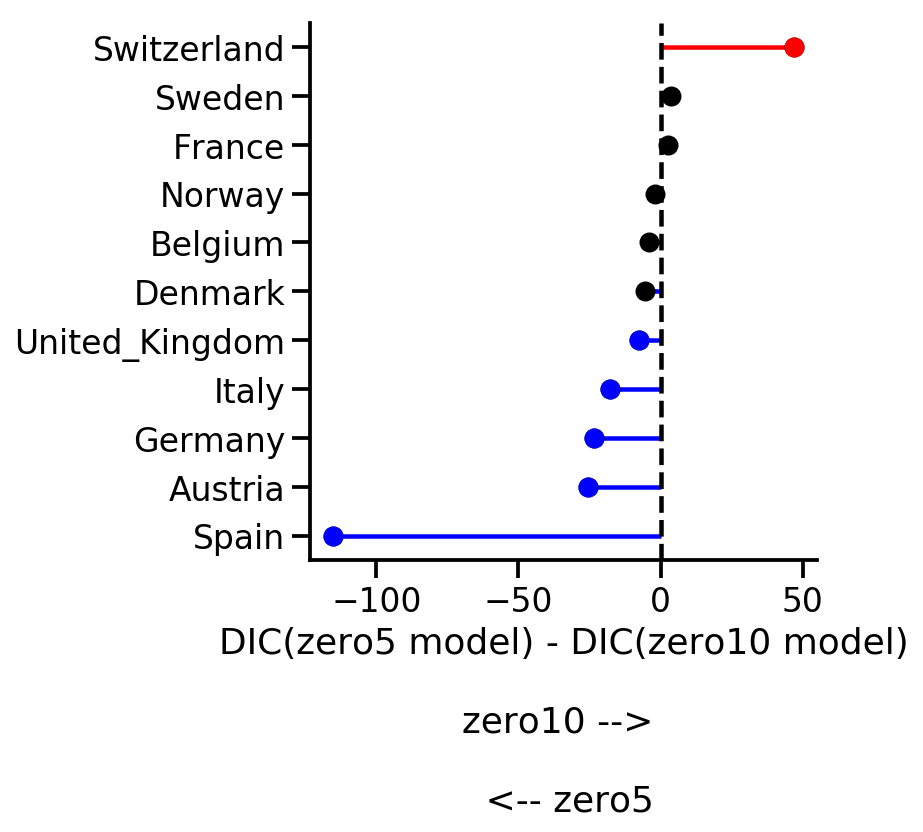

In [13]:
plot_diff(countries, zero5[0], zero10[0], 'DIC(zero5 model) - DIC(zero10 model)', 'zero10', 'zero5')

[('France', -0.4),
 ('Belgium', -0.1),
 ('United_Kingdom', -0.1),
 ('Austria', 0.2),
 ('Germany', 0.3),
 ('Denmark', 0.3),
 ('Norway', 0.3),
 ('Spain', 1.0),
 ('Switzerland', 1.3),
 ('Sweden', 2.1),
 ('Italy', 3.4)]

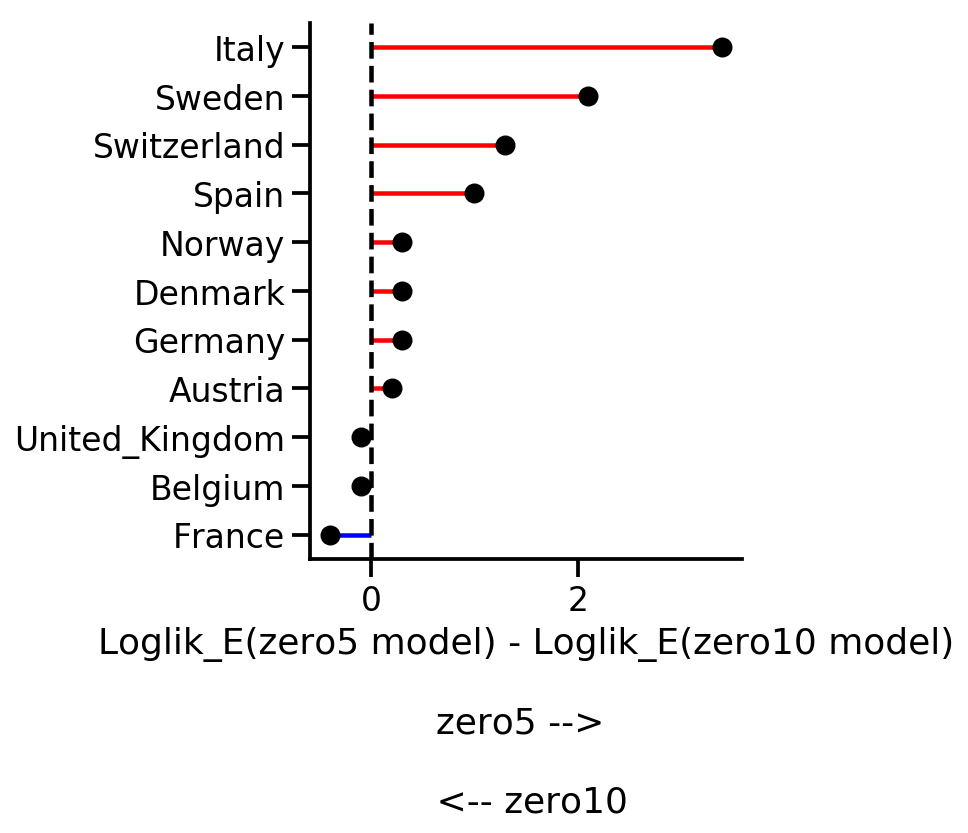

In [14]:
plot_diff(countries, zero5[1], zero10[1], 'Loglik_E(zero5 model) - Loglik_E(zero10 model)','zero5', 'zero10')

[('Switzerland', -12.7),
 ('France', -1.7),
 ('Sweden', -0.3),
 ('Norway', -0.1),
 ('Belgium', 0.5),
 ('Denmark', 0.8),
 ('United_Kingdom', 1.1),
 ('Italy', 1.9),
 ('Germany', 2.0),
 ('Austria', 6.1),
 ('Spain', 28.0)]

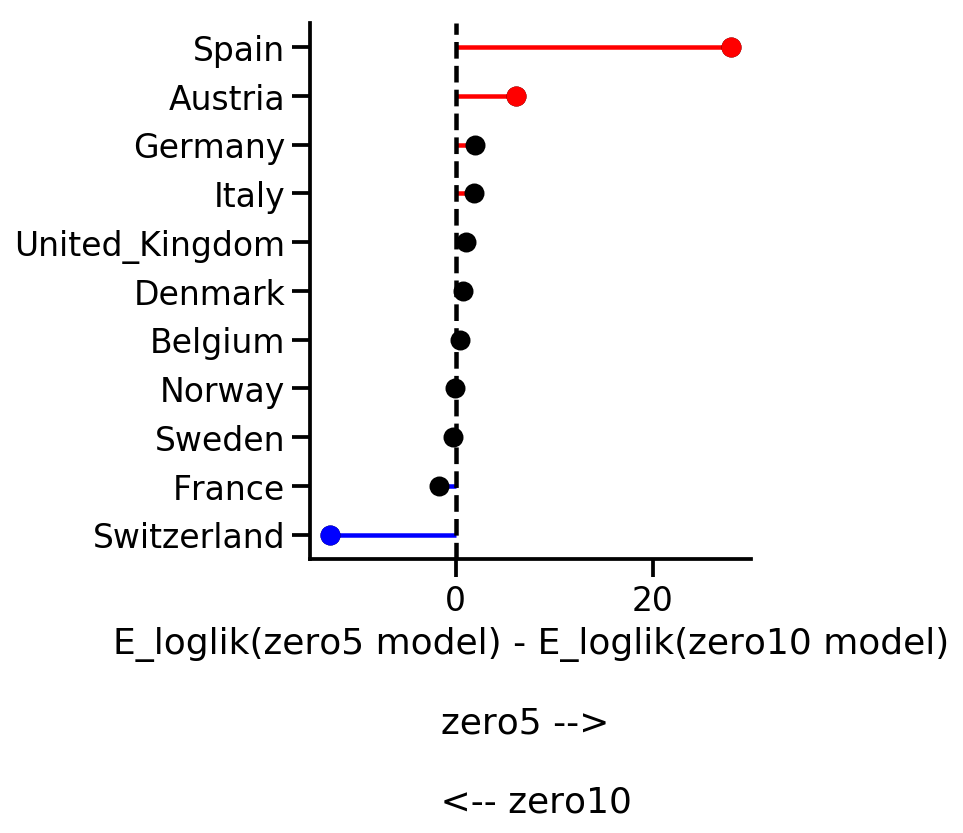

In [15]:
plot_diff(countries, zero5[2], zero10[2], 'E_loglik(zero5 model) - E_loglik(zero10 model)','zero5', 'zero10')

1 zero


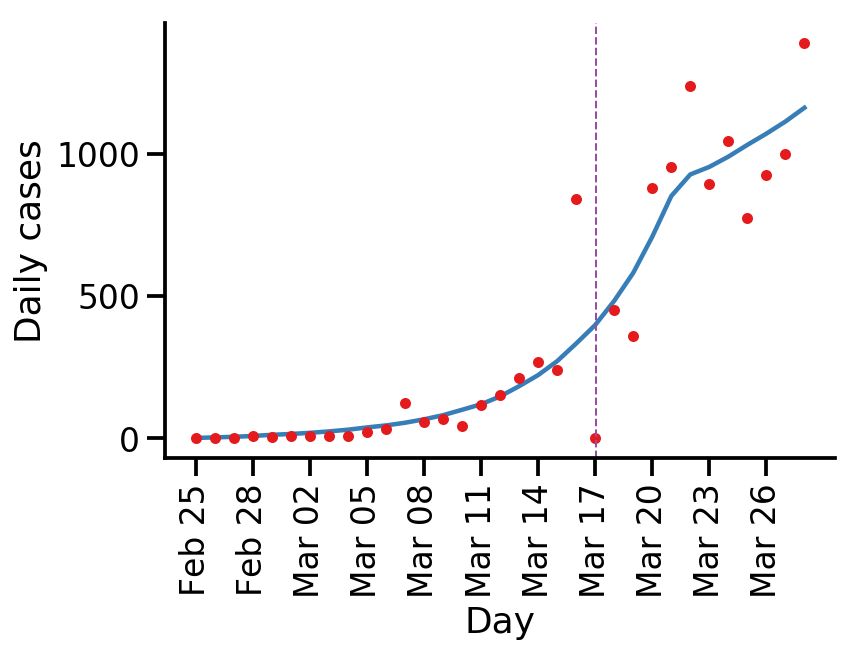

In [16]:
dir_name = '../{}/{}/inference/'.format('output','2020-04-29-prior-walkers-autocorr-model1-uniform')
load_data(dir_name+'Switzerland'+'.npz','Switzerland')
ax = plot_incidences();
print('1 zero')

15 zero


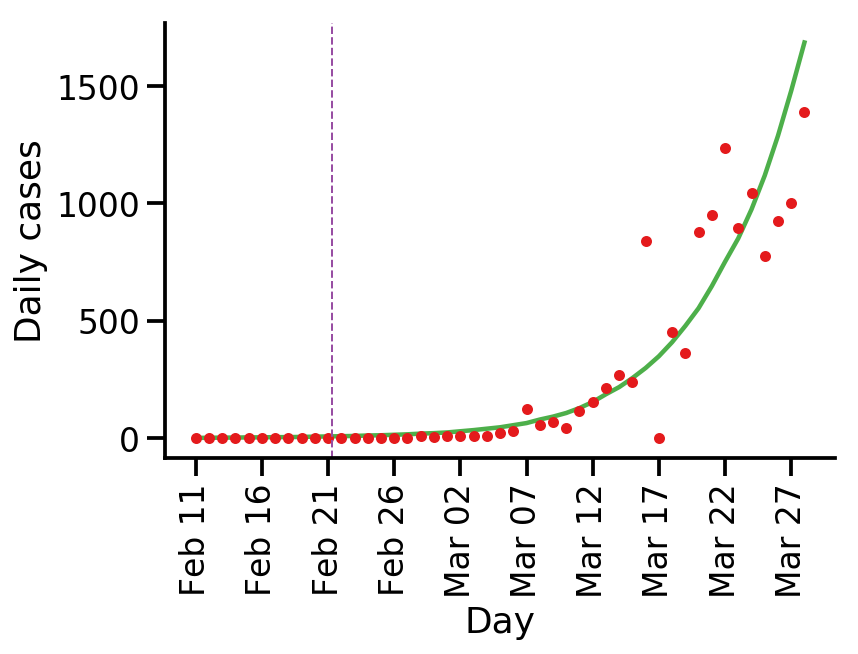

In [26]:
dir_name = '../{}/{}/inference/'.format('output','2020-05-09-zero-15-uniform')
load_data(dir_name+'Switzerland'+'.npz','Switzerland')
plot_incidences(ax,color=green)
print('15 zero')

[('Switzerland', -58.1),
 ('Italy', -29.3),
 ('France', -24.2),
 ('Germany', -22.3),
 ('Denmark', -7.5),
 ('Austria', -6.6),
 ('Norway', -5.2),
 ('Sweden', -4.3),
 ('Belgium', -4.1),
 ('United_Kingdom', 25.7),
 ('Spain', 31.6)]

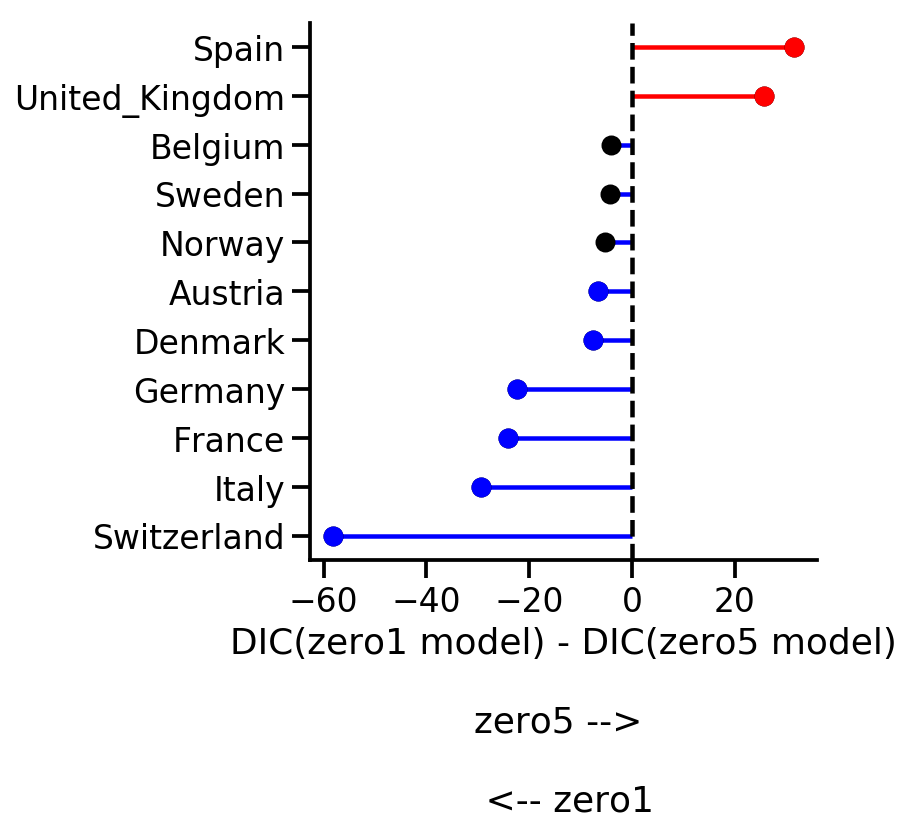

In [23]:
plot_diff(countries, zero1[0], zero5[0], 'DIC(zero1 model) - DIC(zero5 model)', 'zero5', 'zero1')

[('Germany', -0.1),
 ('Denmark', 0.2),
 ('Sweden', 0.4),
 ('Belgium', 0.5),
 ('United_Kingdom', 0.5),
 ('Spain', 0.5),
 ('France', 0.5),
 ('Switzerland', 0.6),
 ('Austria', 1.0),
 ('Norway', 1.5),
 ('Italy', 4.4)]

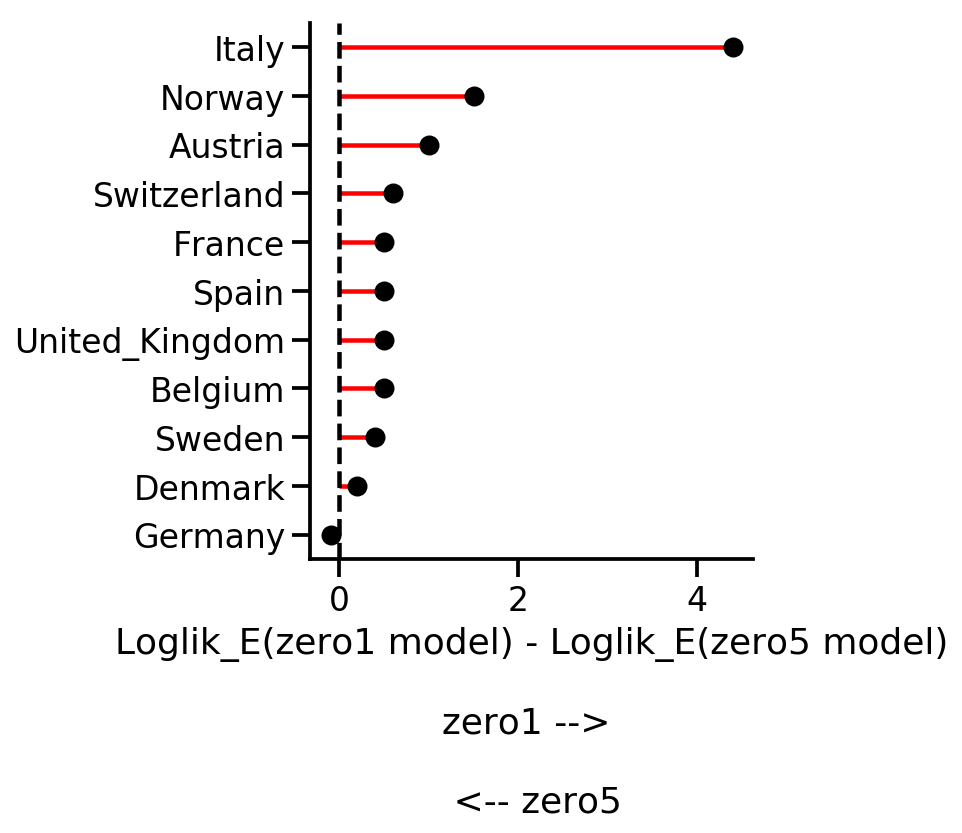

In [25]:
plot_diff(countries, zero1[1], zero5[1], 'Loglik_E(zero1 model) - Loglik_E(zero5 model)','zero1', 'zero5')

1 zero


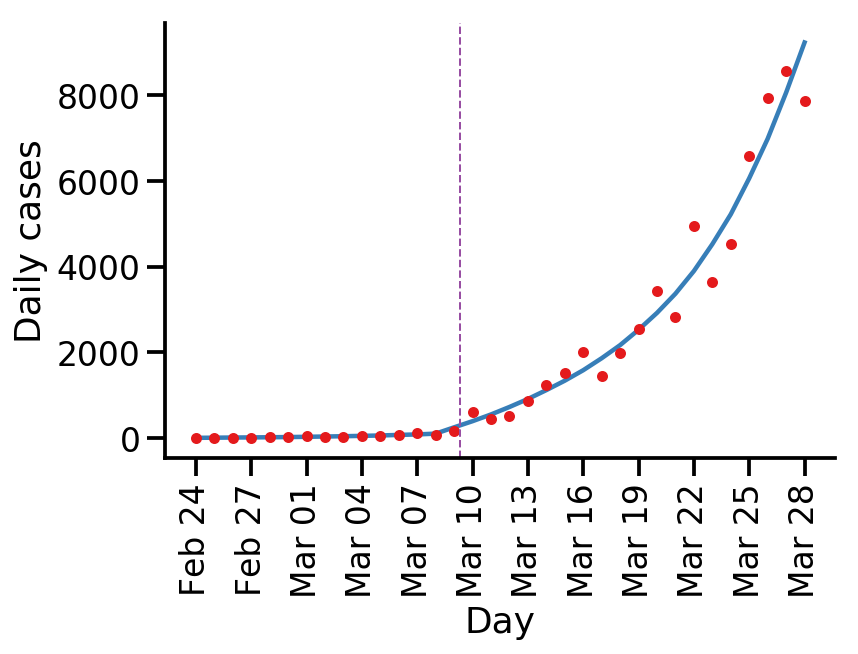

In [27]:
dir_name = '../{}/{}/inference/'.format('output','2020-04-29-prior-walkers-autocorr-model1-uniform')
load_data(dir_name+'Spain'+'.npz','Spain')
ax = plot_incidences();
print('1 zero')

5 zero


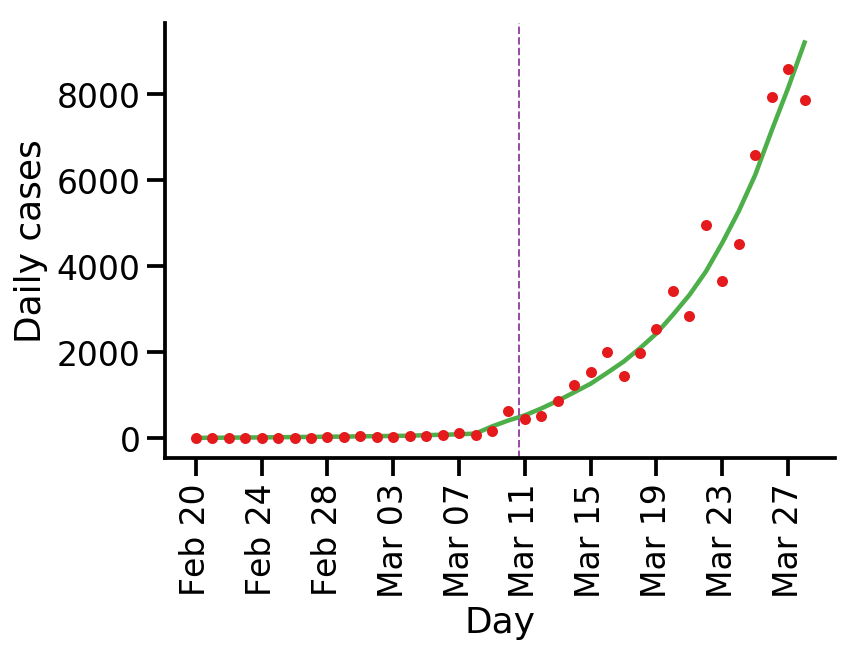

In [28]:
dir_name = '../{}/{}/inference/'.format('output','2020-05-09-zero-5-uniform')
load_data(dir_name+'Spain'+'.npz','Spain')
plot_incidences(ax,color=green)
print('5 zero')